In [16]:
import numpy as np
import pandas as pd
from tensorflow.keras.utils import img_to_array, load_img

In [7]:
import matplotlib.pyplot as plt
import os

In [5]:
from keras.preprocessing.image import ImageDataGenerator
from keras.layers import Dense,Input,Dropout,GlobalAveragePooling2D,Flatten,Conv2D,BatchNormalization,Activation,MaxPooling2D
from keras.models import Model,Sequential
from keras.optimizers import Adam,SGD,RMSprop
from tensorflow.keras.saving import load_model

2023-09-04 09:18:32.290905: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.


In [10]:
picture_size = 48
folder_path = '/Users/admin/Downloads/archive/'

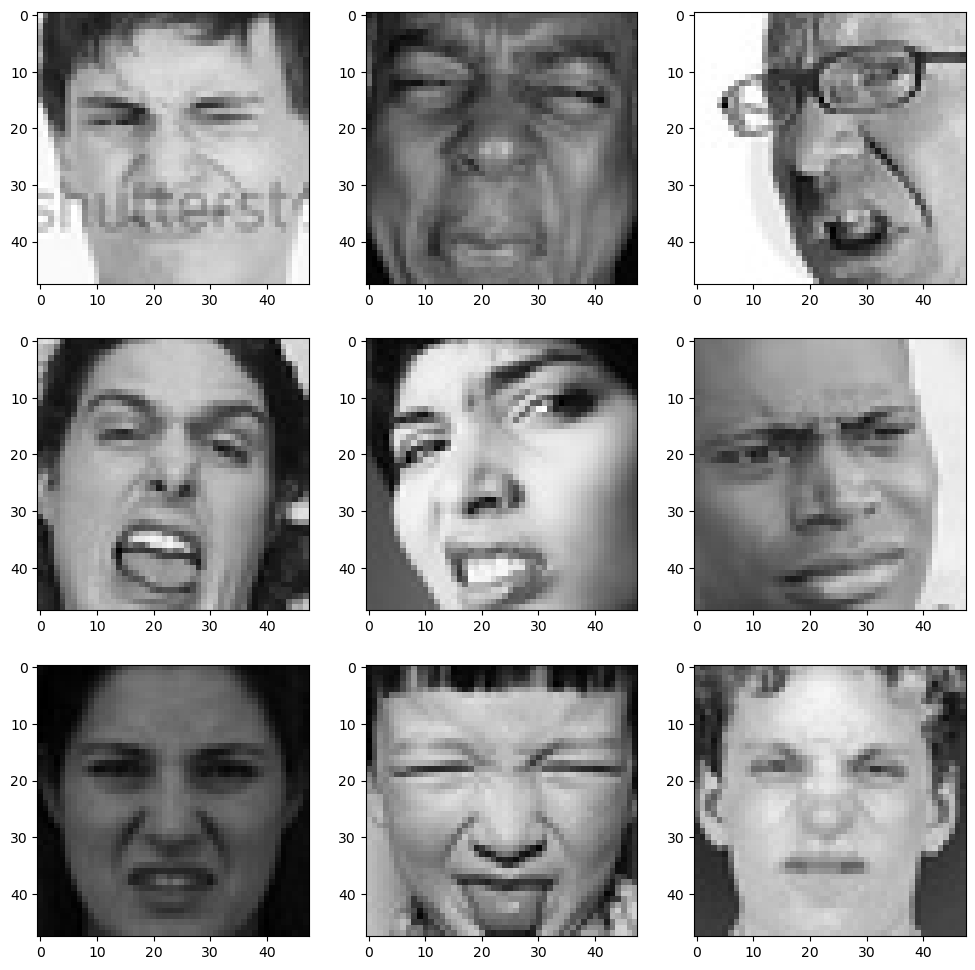

In [10]:
expression = 'disgust'

plt.figure(figsize= (12,12))
for i in range(1, 10, 1):
    plt.subplot(3,3,i)
    img = load_img(folder_path+"train/"+expression+"/"+
                  os.listdir(folder_path+ "train/" + expression)[i], target_size=(picture_size, picture_size))
    plt.imshow(img)   
plt.show()

In [8]:
data_gen_train  = ImageDataGenerator()
data_gen_val = ImageDataGenerator()

In [11]:
train_data = data_gen_train.flow_from_directory(folder_path+"train",
                                              target_size = (picture_size,picture_size),
                                              color_mode = "grayscale",
                                              batch_size=128,
                                              class_mode='categorical',
                                              shuffle=True)


test_data = data_gen_val.flow_from_directory(folder_path+"test",
                                              target_size = (picture_size,picture_size),
                                              color_mode = "grayscale",
                                              batch_size=128,
                                              class_mode='categorical',
                                              shuffle=False)

Found 28709 images belonging to 7 classes.
Found 7178 images belonging to 7 classes.


In [13]:
model = Sequential()

#1-ий шар CNN
model.add(Conv2D(64,(3,3),padding = 'same',input_shape = (48,48,1)))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))

In [14]:
#2-ий шар CNN
model.add(Conv2D(128, (3, 3), padding = 'same'))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))

In [15]:
#3-ий шар CNN
model.add(Conv2D(512, (3, 3), padding = 'same'))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))

In [16]:
#4-ий шар CNN
model.add(Conv2D(512, (3, 3), padding = 'same'))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))

model.add(Flatten())

In [17]:
#1-ий шар нейромережі
model.add(Dense(512))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(Dropout(0.25))

In [18]:
#2-ий шар нейромережі
model.add(Dense(512))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(Dropout(0.25))

In [19]:
#Вихідний шар
model.add(Dense(7, activation='softmax'))

In [20]:
model.compile(optimizer=Adam(learning_rate=0.00001), loss='categorical_crossentropy', metrics=['accuracy'])

In [21]:
from keras.callbacks import EarlyStopping, ModelCheckpoint, ReduceLROnPlateau

checkpoint = ModelCheckpoint("model_checkpoint.h5", 
                             monitor = 'val_accuracy', 
                             verbose = 1, save_best_only = True, 
                             mode = 'max')

earlystopping = EarlyStopping(monitor = 'val_loss', 
                              verbose = 1, patience = 3, 
                              restore_best_weights = True)

reduce = ReduceLROnPlateau(monitor = "val_loss",
                            patience = 3,
                            factor=0.2,
                            verbose = 1,
                            min_delta=0.0001)
list_callbacks = [checkpoint, earlystopping, reduce]

In [22]:
fit_model = model.fit_generator(generator = train_data, 
                          steps_per_epoch = train_data.n/train_data.batch_size, 
                          epochs = 15, 
                          verbose = 1, 
                          callbacks = list_callbacks,
                          validation_data = test_data,
                          validation_steps = test_data.n/test_data.batch_size,
                          )

/var/folders/y6/0v8f_ns90nnct7qv3jxpbx9r0000gn/T/ipykernel_1427/2398755155.py:1: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  fit_model = model.fit_generator(generator = train_set,


Epoch 1/15
225/224 [==============================] - ETA: -24s - loss: 1.8682 - accuracy: 0.2740
Epoch 1: val_accuracy improved from -inf to 0.16091, saving model to model_checkpoint.h5


/Users/admin/anaconda3/lib/python3.10/site-packages/keras/src/engine/training.py:3000: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


224/224 [==============================] - 7760s 35s/step - loss: 1.8682 - accuracy: 0.2740 - val_loss: 2.0608 - val_accuracy: 0.1609 - lr: 0.0100
Epoch 2/15
225/224 [==============================] - ETA: -1s - loss: 1.5079 - accuracy: 0.4145
Epoch 2: val_accuracy improved from 0.16091 to 0.34787, saving model to model_checkpoint.h5
224/224 [==============================] - 526s 2s/step - loss: 1.5079 - accuracy: 0.4145 - val_loss: 1.6677 - val_accuracy: 0.3479 - lr: 0.0100
Epoch 3/15
225/224 [==============================] - ETA: -2s - loss: 1.3084 - accuracy: 0.4963
Epoch 3: val_accuracy improved from 0.34787 to 0.48454, saving model to model_checkpoint.h5
224/224 [==============================] - 670s 3s/step - loss: 1.3084 - accuracy: 0.4963 - val_loss: 1.3476 - val_accuracy: 0.4845 - lr: 0.0100
Epoch 4/15
225/224 [==============================] - ETA: -1s - loss: 1.2129 - accuracy: 0.5384
Epoch 4: val_accuracy did not improve from 0.48454
224/224 [============================

In [28]:
float_history = {key: [float(value) for value in values] for key, values in fit_model.history.items()}

# Збереження історії навчання з типами float у JSON файл
with open('history.json', 'w') as json_file:
    json.dump(float_history, json_file)

In [2]:
import json
with open('history.json', 'r') as json_file:
    load_history = json.load(json_file)

In [3]:
load_history['loss']

[1.8682312965393066,
 1.5079104900360107,
 1.308388352394104,
 1.2129335403442383,
 1.136664628982544,
 1.0769857168197632,
 1.0321452617645264,
 0.9819667339324951,
 0.941015362739563,
 0.891560971736908,
 0.8336600065231323,
 0.8034405708312988,
 0.747839629650116]

In [29]:
parametrs = {}
parametrs['loss'] = fit_model.history['loss']
parametrs['val_loss'] = fit_model.history['val_loss']
parametrs['accuracy'] = fit_model.history['accuracy']
parametrs['val_accuracy'] = fit_model.history['val_accuracy']

In [6]:
loaded_model = load_model('model_checkpoint.h5')

In [14]:
predict_model = loaded_model.predict(test_data)

57/57 [==============================] - 33s 570ms/step


In [43]:
number_pictures = [i for i in range(1, test_data.n+1)]
predict_list = np.argmax(predict_model, axis=1)
emotion_name = [*test_data.class_indices]
predict_emotion = [emotion_name[i] for i in predict_list]

In [44]:
data_dict = {'number_pictures': number_pictures, 'predict_class': predict_emotion}
predict_dataframe = pd.DataFrame(data_dict)

In [46]:
predict_dataframe.head()

,number_pictures,predict_class
0,1,sad
1,2,angry
2,3,sad
3,4,sad
4,5,angry


In [ ]:
# model.save('my_model.h5')

In [ ]:
# loaded_model = load_model('my_model.h5', compile=True)

In [ ]:
# fit_with_13_epohs = loaded_model.fit_generator(generator = train_set, 
#                           steps_per_epoch = train_set.n/train_set.batch_size, 
#                           epochs = 15, 
#                           verbose = 1, 
#                           callbacks = callbacks_list,
#                           validation_data = test_set,
#                           validation_steps = test_set.n/test_set.batch_size,
#                           initial_epoch = 14
#                           )

In [ ]:
# parametrs['loss'].extend(fit_with_13_epohs.history['loss'])
# parametrs['val_loss'].extend(fit_with_13_epohs.history['val_loss'])
# parametrs['accuracy'] = fit_with_13_epohs.history['accuracy']
# parametrs['val_accuracy'] = fit_with_13_epohs.history['val_accuracy']

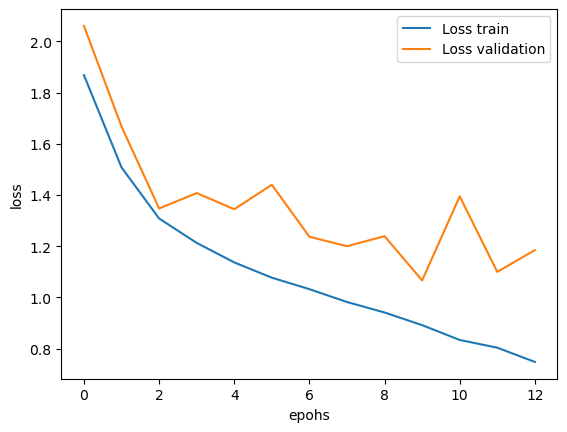

In [26]:
plt.plot(fit_model.history['loss'], label='Loss train')
plt.plot(fit_model.history['val_loss'], label='Loss validation')
plt.xlabel('epohs')
plt.ylabel('loss')
plt.legend()
plt.show()

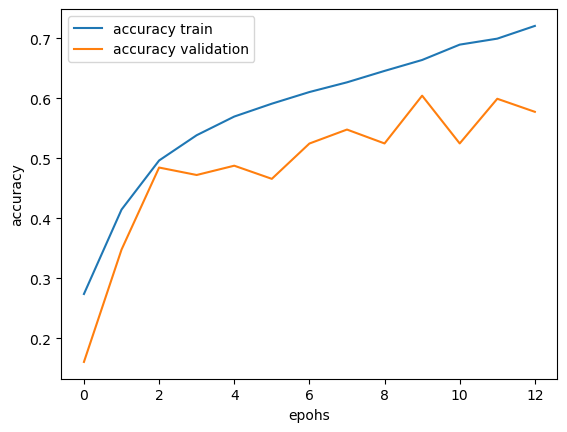

In [31]:
plt.plot(fit_model.history['accuracy'], label='accuracy train')
plt.plot(fit_model.history['val_accuracy'], label='accuracy validation')
plt.xlabel('epohs')
plt.ylabel('accuracy')
plt.legend()
plt.show()